# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 14 February 2021

## Lesson 8 The Pandas module 
- About Pandas
- How to install
    - Anaconda
    - JupyterHub/Lab (on Linux)
    - JupyterHub/Lab (on MacOS)
    - JupyterHub/Lab (on Windoze)
- The Dataframe
    - Primatives
    - Using Pandas
    - Create, Modify, Delete datagrames
    - Slice Dataframes
    - Conditional Selection
    - Synthetic Programming (Symbolic Function Application)
    - Files
- Access Files from a remote Web Server
    - Get file contents
    - Get the actual file
    - Adaptations for encrypted servers (future semester)
---
### Special Script Blocks

In [3]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

---
## Objectives
1. To understand the **dataframe abstraction** as implemented in the Pandas library(module).
    1. To be able to access and manipulate data within a dataframe
    2. To be able to obtain basic statistical measures of data within a dataframe
2. Read/Write from/to files
    1. MS Excel-type files (.xls,.xlsx,.csv) (LibreOffice files use the MS .xml standard)
    2. Ordinary ASCII (.txt) files 
3. Access files directly from a URL (advanced concept)
    1. Using a wget-type function
    2. Using a curl-type function
    3. Using API keys (future versions)


### Pandas: 
Pandas is the core library for dataframe manipulation in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. The library’s name is derived from the term ‘Panel Data’. 
If you are curious about Pandas, this cheat sheet is recommended: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#### Data Structure 
The Primary data structure is called a dataframe.  It is an **abstraction** where data are represented as a 2-dimensional mutable and heterogenous tabular data structure; much like a Worksheet in MS Excel. The structure itself is popular among statisticians and data scientists and business executives.  

According to the marketing department 
*"Pandas Provides rich data structures and functions designed to make working with data fast, easy, and expressive.  It is useful in data manipulation, cleaning, and analysis; Pandas excels in performance and productivity "*

---

# The Dataframe

A data table is called a `DataFrame` in pandas (and other programming environments too). The figure below from [https://pandas.pydata.org/docs/getting_started/index.html](https://pandas.pydata.org/docs/getting_started/index.html) illustrates a dataframe model:

![](01-table-dataframe.png) 

Each **column** and each **row** in a dataframe is called a series, the header row, and index column are special. 
Like MS Excel we can query the dataframe to find the contents of a particular `cell` using its **row name** and **column name**, or operate on entire **rows** and **columns**

To use pandas, we need to import the module.

## Computational Thinking Concepts

The CT concepts expressed within Pandas include:

- `Decomposition` :  Data interpretation, manipulation, and analysis of Pandas dataframes is an act of decomposition -- although the dataframes can be quite complex.
- `Abstraction` : The dataframe is a data representation abstraction that allows for placeholder operations, later substituted with specific contents for a problem; enhances reuse and readability.  We leverage the principle of algebraic replacement using these abstractions.
- `Algorithms` :  Data interpretation, manipulation, and analysis of dataframes are generally implemented as part of a supervisory algorithm.

## Module Set-Up

In principle, Pandas should be available in a default Anaconda install 
- You should not have to do any extra installation steps to install the library in Python
- You do have to **import** the library in your scripts

How to check
- Simply open a code cell and run `import pandas` if the notebook does not protest (i.e. pink block of error), the youis good to go.

In [4]:
import pandas

If you do get an error, that means that you will have to install using `conda` or `pip`; you are on-your-own here!  On the **content server** the process is:

1. Open a new terminal from the launcher
2. Change to root user `su` then enter the root password
3. `sudo -H /opt/jupyterhib/bin/python3 -m pip install pandas`
4. Wait until the install is complete; for security, user `compthink` is not in the `sudo` group
5. Verify the install by trying to execute `import pandas` as above.

The process above will be similar on a Macintosh, or Windows if you did not use an Anaconda distribution.   Best is to have a sucessful anaconda install, or go to the [GoodJobUntilMyOrgansGetHarvested](https://apply.mysubwaycareer.com/us/en/). 

If you have to do this kind of install, you will have to do some reading, some references I find useful are:
1. https://jupyterlab.readthedocs.io/en/stable/user/extensions.html
2. https://www.pugetsystems.com/labs/hpc/Note-How-To-Install-JupyterHub-on-a-Local-Server-1673/#InstallJupyterHub
3. https://jupyterhub.readthedocs.io/en/stable/installation-guide-hard.html (This is the approach on the content server which has a functioning JupyterHub)

### Dataframe-type Structure using primative python

First lets construct a dataframe like object using python primatives.
We will construct 3 lists, one for row names, one for column names, and one for the content.

In [5]:
import numpy
mytabular = numpy.random.randint(1,100,(5,4))
myrowname = ['A','B','C','D','E']
mycolname = ['W','X','Y','Z']
mytable = [['' for jcol in range(len(mycolname)+1)] for irow in range(len(myrowname)+1)] #non-null destination matrix, note the implied loop construction

The above builds a placeholder named `mytable` for the psuedo-dataframe.
Next we populate the table, using a for loop to write the column names in the first row, row names in the first column, and the table fill for the rest of the table.

In [6]:
for irow in range(1,len(myrowname)+1): # write the row names
    mytable[irow][0]=myrowname[irow-1]
for jcol in range(1,len(mycolname)+1): # write the column names
    mytable[0][jcol]=mycolname[jcol-1]  
for irow in range(1,len(myrowname)+1): # fill the table (note the nested loop)
    for jcol in range(1,len(mycolname)+1):
        mytable[irow][jcol]=mytabular[irow-1][jcol-1]

Now lets print the table out by row and we see we have a very dataframe-like structure

In [7]:
for irow in range(0,len(myrowname)+1):
    print(mytable[irow][0:len(mycolname)+1])

['', 'W', 'X', 'Y', 'Z']
['A', 25, 43, 34, 7]
['B', 49, 28, 24, 53]
['C', 66, 21, 16, 33]
['D', 71, 6, 21, 63]
['E', 13, 94, 13, 17]


We can also query by row 

In [8]:
print(mytable[3][0:len(mycolname)+1])

['C', 66, 21, 16, 33]


Or by column

In [9]:
for irow in range(0,len(myrowname)+1):  #cannot use implied loop in a column slice
    print(mytable[irow][2])

X
43
28
21
6
94


Or by row+column index; sort of looks like a spreadsheet syntax.

In [10]:
print(' ',mytable[0][3])
print(mytable[3][0],mytable[3][3])

  Y
C 16


# Now we shall create a proper dataframe
We will now do the same using pandas

In [11]:
mydf = pandas.DataFrame(numpy.random.randint(1,100,(5,4)), ['A','B','C','D','E'], ['W','X','Y','Z'])
mydf

,W,X,Y,Z
A,8,24,35,65
B,64,50,8,40
C,57,40,37,79
D,59,22,16,85
E,2,74,19,28


We can also turn our table into a dataframe, notice how the constructor adds header row and index column

In [12]:
mydf1 = pandas.DataFrame(mytable)
mydf1

,0,1,2,3,4
0,,W,X,Y,Z
1,A,25,43,34,7
2,B,49,28,24,53
3,C,66,21,16,33
4,D,71,6,21,63
5,E,13,94,13,17


To get proper behavior, we can just reuse our original objects

In [13]:
mydf2 = pandas.DataFrame(mytabular,myrowname,mycolname)
mydf2

,W,X,Y,Z
A,25,43,34,7
B,49,28,24,53
C,66,21,16,33
D,71,6,21,63
E,13,94,13,17


Why are `mydf` and `mydf2` different?

### Getting the shape of dataframes

The shape method, which is available after the dataframe is constructed, will return the row and column rank (count) of a dataframe.

In [14]:
mydf.shape

(5, 4)

In [15]:
mydf1.shape

(6, 5)

In [16]:
mydf2.shape

(5, 4)

### Appending new columns
To append a column simply assign a value to a new column name to the dataframe

In [17]:
mydf['new']= 'NA'

In [18]:
mydf

,W,X,Y,Z,new
A,8,24,35,65,NA
B,64,50,8,40,NA
C,57,40,37,79,NA
D,59,22,16,85,NA
E,2,74,19,28,NA


## Appending new rows
This is sometimes a bit trickier but here is one way:
- create a copy of a row, give it a new name. 
- concatenate it back into the dataframe.

In [19]:
newrow = mydf.loc[['E']].rename(index={"E": "X"}) # create a single row, rename the index
newtable = pandas.concat([mydf,newrow]) # concatenate the row to bottom of df - note the syntax

In [20]:
newtable

,W,X,Y,Z,new
A,8,24,35,65,NA
B,64,50,8,40,NA
C,57,40,37,79,NA
D,59,22,16,85,NA
E,2,74,19,28,NA
X,2,74,19,28,NA


### Removing Rows and Columns

To remove a column is straightforward, we use the drop method

In [21]:
newtable.drop('new', axis=1, inplace = True)
newtable

,W,X,Y,Z
A,8,24,35,65
B,64,50,8,40
C,57,40,37,79
D,59,22,16,85
E,2,74,19,28
X,2,74,19,28


To remove a row, you really got to want to, easiest is probablty to create a new dataframe with the row removed

In [22]:
newtable = newtable.loc[['A','B','D','E','X']] # select all rows except C
newtable

,W,X,Y,Z
A,8,24,35,65
B,64,50,8,40
D,59,22,16,85
E,2,74,19,28
X,2,74,19,28


In [23]:
# or just use drop with axis specify
newtable.drop('X', axis=0, inplace = True)

In [24]:
newtable

,W,X,Y,Z
A,8,24,35,65
B,64,50,8,40
D,59,22,16,85
E,2,74,19,28


# Indexing
We have already been indexing, but a few examples follow:

In [25]:
newtable['X'] #Selecing a single column

A    24
B    50
D    22
E    74
Name: X, dtype: int64

In [26]:
newtable[['X','W']] #Selecing a multiple columns

,X,W
A,24,8
B,50,64
D,22,59
E,74,2


In [27]:
newtable.loc['E'] #Selecing rows based on label via loc[ ] indexer

W     2
X    74
Y    19
Z    28
Name: E, dtype: int64

In [28]:
newtable
    

,W,X,Y,Z
A,8,24,35,65
B,64,50,8,40
D,59,22,16,85
E,2,74,19,28


In [29]:
newtable.loc[['E','D','B']] #Selecing multiple rows based on label via loc[ ] indexer

,W,X,Y,Z
E,2,74,19,28
D,59,22,16,85
B,64,50,8,40


In [30]:
newtable.loc[['B','E','D'],['X','Y']] #Selecting elements via both rows and columns via loc[ ] indexer

,X,Y
B,50,8
E,74,19
D,22,16


# Conditional Selection

In [31]:
mydf = pandas.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
mydf

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit
5,6,111,watermelon
6,7,222,banana
7,8,222,peach


In [32]:
#What fruit corresponds to the number 555 in ‘col2’?

mydf[mydf['col2']==555]['col3']

1    apple
Name: col3, dtype: object

In [33]:
#What fruit corresponds to the minimum number in ‘col2’?

mydf[mydf['col2']==mydf['col2'].min()]['col3']

5    watermelon
Name: col3, dtype: object

# Descriptor Functions

In [34]:
#Creating a dataframe from a dictionary

mydf = pandas.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
mydf

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit
5,6,111,watermelon
6,7,222,banana
7,8,222,peach


### `head` method

Returns the first few rows, useful to infer structure

In [35]:
#Returns only the first five rows

mydf.head()

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit


### `info` method

Returns the data model (data column count, names, data types)

In [36]:
#Info about the dataframe

mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    8 non-null      int64 
 1   col2    8 non-null      int64 
 2   col3    8 non-null      object
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


### `describe` method

Returns summary statistics of each numeric column.  
Also returns the minimum and maximum value in each column, and the IQR (Interquartile Range).  
Again useful to understand structure of the columns.

In [37]:
#Statistics of the dataframe

mydf.describe()

,col1,col2
count,8.00000,8.0000
mean,4.50000,416.2500
std,2.44949,211.8576
min,1.00000,111.0000
25%,2.75000,222.0000
50%,4.50000,444.0000
75%,6.25000,582.7500
max,8.00000,666.0000


### Counting and Sum methods

There are also methods for counts and sums by specific columns

In [38]:
mydf['col2'].sum() #Sum of a specified column

3330

The `unique` method returns a list of unique values (filters out duplicates in the list, underlying dataframe is preserved)

In [39]:
mydf['col2'].unique() #Returns the list of unique values along the indexed column 

array([444, 555, 666, 111, 222])

The `nunique` method returns a count of unique values

In [40]:
mydf['col2'].nunique() #Returns the total number of unique values along the indexed column 

5

The `value_counts()` method returns the count of each unique value (kind of like a histogram, but each value is the bin)

In [41]:
mydf['col2'].value_counts()  #Returns the number of occurences of each unique value

222    2
444    2
666    2
111    1
555    1
Name: col2, dtype: int64

## Using functions in dataframes - symbolic apply

The power of **Pandas** is an ability to apply a function to each element of a dataframe series (or a whole frame) by a technique called symbolic (or synthetic programming) application of the function.

This employs principles of **pattern matching**, **abstraction**, and **algorithm development**; a holy trinity of Computational Thinning.

It's somewhat complicated but quite handy, best shown by an example:

In [45]:
def times2(x):  # A prototype function to scalar multiply an object x by 2
    return(x*2)

print(mydf)
print('Apply the times2 function to col2')
mydf['reallynew'] = mydf['col2'].apply(times2) #Symbolic apply the function to each element of column col2, result is another dataframe

   col1  col2        col3
0     1   444      orange
1     2   555       apple
2     3   666       grape
3     4   444       mango
4     5   666   jackfruit
5     6   111  watermelon
6     7   222      banana
7     8   222       peach
Apply the times2 function to col2


In [46]:
mydf

,col1,col2,col3,reallynew
0,1,444,orange,888
1,2,555,apple,1110
2,3,666,grape,1332
3,4,444,mango,888
4,5,666,jackfruit,1332
5,6,111,watermelon,222
6,7,222,banana,444
7,8,222,peach,444


## Sorts 

In [42]:
mydf.sort_values('col2', ascending = True) #Sorting based on columns 

,col1,col2,col3
5,6,111,watermelon
6,7,222,banana
7,8,222,peach
0,1,444,orange
3,4,444,mango
1,2,555,apple
2,3,666,grape
4,5,666,jackfruit


In [43]:
mydf.sort_values('col3', ascending = True) #Lexiographic sort

,col1,col2,col3
1,2,555,apple
6,7,222,banana
2,3,666,grape
4,5,666,jackfruit
3,4,444,mango
0,1,444,orange
7,8,222,peach
5,6,111,watermelon


# Aggregating (Grouping Values) dataframe contents


In [44]:
#Creating a dataframe from a dictionary

data = {
    'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1' : [1, 2, 3, 4, 5, 6],
    'data2' : [10, 11, 12, 13, 14, 15],
    'data3' : [20, 21, 22, 13, 24, 25]
}

mydf1 = pandas.DataFrame(data)
mydf1

,key,data1,data2,data3
0,A,1,10,20
1,B,2,11,21
2,C,3,12,22
3,A,4,13,13
4,B,5,14,24
5,C,6,15,25


In [45]:
# Grouping and summing values in all the columns based on the column 'key'

mydf1.groupby('key').sum()

,data1,data2,data3
key,,,
A,5,23,33
B,7,25,45
C,9,27,47


In [46]:
# Grouping and summing values in the selected columns based on the column 'key'

mydf1.groupby('key')[['data1', 'data2']].sum()

,data1,data2
key,,
A,5,23
B,7,25
C,9,27


# Filtering out missing values

Filtering and *cleaning* are often used to describe the process where data that does not support a narrative is removed ;typically for maintenance of profit applications, if the data are actually missing that is common situation where cleaning is justified.

In [47]:
#Creating a dataframe from a dictionary

df = pandas.DataFrame({'col1':[1,2,3,4,None,6,7,None],
                   'col2':[444,555,None,444,666,111,None,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
df

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
2,3.0,NaN,grape
3,4.0,444.0,mango
4,NaN,666.0,jackfruit
5,6.0,111.0,watermelon
6,7.0,NaN,banana
7,NaN,222.0,peach


Below we drop any row that contains a `NaN` code.

In [48]:
df_dropped = df.dropna()
df_dropped

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
3,4.0,444.0,mango
5,6.0,111.0,watermelon


Below we replace `NaN` codes with some value, in this case 0

In [49]:
df_filled1 = df.fillna(0)
df_filled1

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
2,3.0,0.0,grape
3,4.0,444.0,mango
4,0.0,666.0,jackfruit
5,6.0,111.0,watermelon
6,7.0,0.0,banana
7,0.0,222.0,peach


Below we replace `NaN` codes with some value, in this case the mean value of of the column in which the missing value code resides.

In [50]:
df_filled2 = df.fillna(df.mean())
df_filled2

,col1,col2,col3
0,1.000000,444.0,orange
1,2.000000,555.0,apple
2,3.000000,407.0,grape
3,4.000000,444.0,mango
4,3.833333,666.0,jackfruit
5,6.000000,111.0,watermelon
6,7.000000,407.0,banana
7,3.833333,222.0,peach


---
## Reading a File into a Dataframe

Pandas has methods to read common file types, such as `csv`,`xlsx`, and `json`.  
Ordinary text files are also quite manageable.

On a machine you control you can write script to retrieve files from the internet and process them.


In [47]:
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')  #Reading a .csv file
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


Similar to reading and writing .csv files, you can also read and write .xslx files as below (useful to know this)

In [49]:
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', engine='openpyxl') #Reading a .xlsx file
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


# Writing a dataframe to file

In [72]:
#Creating and writing to a .csv file
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile1.csv')
readfilecsv = pandas.read_csv('CSV_WritingFile1.csv')
print(readfilecsv)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


In [54]:
#Creating and writing to a .csv file by excluding row labels 
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile2.csv', index = False)
readfilecsv = pandas.read_csv('CSV_WritingFile2.csv')
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [73]:
#Creating and writing to a .xlsx file
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1')
readfileexcel.to_excel('Excel_WritingFile.xlsx', sheet_name='MySheet', index = False)
readfileexcel = pandas.read_excel('Excel_WritingFile.xlsx', sheet_name='MySheet')
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


---

## Downloading files from websites (optional)

This section shows how to get files from a remote computer.   There are several ways to get the files, most importantly  you need the FQDN to the file.

### Method 1: Get data from a file on a remote server (unencrypted)
This section shows how to obtain data files from public URLs.  

Prerequesites:

- You know the FQDN to the file it will be in structure of "http://server-name/.../filename.ext"
- The server is running ordinary (unencrypted) web services, i.e. `http://...`

#### Web Developer Notes
If you want to distribute files (web developers) the files need to be in the server webroot, but can be deep into the heirarchial structure.

Here we will do an example with a file that contains topographic data in XYZ format, without header information.

The first few lines of the remote file look like:

    74.90959724	93.21251922	0
    75.17907367	64.40278759	0
    94.9935575	93.07951286	0
    95.26234119	64.60091165	0
    54.04976655	64.21159095	0
    54.52914363	35.06934342	0
    75.44993558	34.93079513	0
    75.09317373	5.462959114	0
    74.87357468	10.43130083	0
    74.86249082	15.72938748	0

And importantly it is tab delimited.

The module to manipulate url in python is called ``urllib``

Google search to learn more, here we are using only a small component without exception trapping.
    

In [50]:
#Step 1: import needed modules to interact with the internet
from urllib.request import urlopen # import a method that will connect to a url and read file contents
import pandas #import pandas

This next code fragment sets a string called ``remote_url``; it is just a variable, name can be anything that honors python naming rules.
Then the ``urllib`` function ``urlopen`` with read and decode methods is employed, the result is stored in an object named ``elevationXYZ``

In [51]:
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://www.rtfmps.com/share_files/pip-corner-sumps.txt' # 
elevationXYZ = urlopen(remote_url).read().decode().split() # Gets the file contents as a single vector, comma delimited, file is not retained locally

At this point the object exists as a single vector with hundreds of elements. We now need to structure the content.  Here using python primatives, and knowing how the data are supposed to look, we prepare variables to recieve the structured results

In [52]:
#Step 3 Python primatives to structure the data, or use fancy modules (probably easy in numpy)
howmany = len(elevationXYZ) # how long is the vector?
nrow = int(howmany/3)
xyz = [[0 for j in range(3)] for j in range(nrow)] # null space to receive data define columnX

Now that everything is ready, we can extract from the object the values we want into ``xyz``

In [53]:
#Step4 Now will build xyz as a matrix with 3 columns
index = 0
for irow in range(0,nrow):
    xyz[irow][0]=float(elevationXYZ[index])
    xyz[irow][1]=float(elevationXYZ[index+1])
    xyz[irow][2]=float(elevationXYZ[index+2])
    index += 3 #increment the index

``xyz`` is now a 3-column float array and can now probably be treated as a data frame.
Here we use a ``pandas`` method to build the dataframe.

In [54]:
df = pandas.DataFrame(xyz)

Get some info, yep three columns (ordered triples to be precise!)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       774 non-null    float64
 1   1       774 non-null    float64
 2   2       774 non-null    float64
dtypes: float64(3)
memory usage: 18.3 KB


And some summary statistics (meaningless for these data), but now have taken data from the internet and prepared it for analysis.

In [56]:
df.describe()

,0,1,2
count,774.000000,774.000000,774.000000
mean,52.064621,48.770060,2.364341
std,30.883400,32.886277,1.497413
min,-2.113554,-11.360960,0.000000
25%,25.640786,21.809579,2.000000
50%,55.795821,49.059950,2.000000
75%,76.752290,75.015933,4.000000
max,111.726727,115.123931,4.000000


And lets look at the first few rows

In [63]:
df.head()

,0,1,2
0,74.909597,93.212519,0.0
1,75.179074,64.402788,0.0
2,94.993557,93.079513,0.0
3,95.262341,64.600912,0.0
4,54.049767,64.211591,0.0


### Method 2: Get the actual file from a remote web server (unencrypted)

- You know the FQDN to the file it will be in structure of "http://server-name/.../filename.ext"
- The server is running ordinary (unencrypted) web services, i.e. `http://...`

We will need a module to interface with the remote server, in this example lets use something different than ``urllib``. Here we will use ``requests`` , so first we load the module

In [57]:
import requests # Module to process http/https requests

Now we will generate a ``GET`` request to the remote http server.  I chose to do so using a variable to store the remote URL so I can reuse code in future projects.  The ``GET`` request (an http/https method) is generated with the requests method ``get`` and assigned to an object named ``rget`` -- the name is arbitrary.  Next we extract the file from the ``rget`` object and write it to a local file with the name of the remote file - esentially automating the download process. Then we import the ``pandas`` module.

In [58]:
remote_url="http://54.243.252.9/engr-1330-psuedo-course/MyJupyterNotebooks/42-DataScience-EvaporationAnalysis/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)

In [59]:
# verify file exists
! pwd
! ls -la

/home/sensei/engr-1330-webroot/1-Lessons/Lesson08/OriginalPowerpoint
total 1272
drwxr-xr-x 4 sensei sensei   4096 Feb 20 23:14 .
drwxr-xr-x 5 sensei sensei   4096 Feb 15 15:38 ..
drwxr-xr-x 2 sensei sensei   4096 Feb 20 23:11 .ipynb_checkpoints
-rw-rw-r-- 1 sensei sensei  21150 Feb 16 15:42 01-table-dataframe.png
-rw-rw-r-- 1 sensei sensei     51 Feb 16 15:42 CSV_ReadingFile.csv
-rw-rw-r-- 1 sensei sensei     55 Feb 16 15:42 CSV_WritingFile1.csv
-rw-rw-r-- 1 sensei sensei     46 Feb 16 15:42 CSV_WritingFile2.csv
-rw-rw-r-- 1 sensei sensei 693687 Feb 16 15:42 ENGR-1330-Lesson8-Dev.html
-rw-rw-r-- 1 sensei sensei 169797 Feb 20 23:14 ENGR-1330-Lesson8-Dev.ipynb
-rw-rw-r-- 1 sensei sensei   5508 Feb 16 15:42 Excel_ReadingFile.xlsx
-rw-rw-r-- 1 sensei sensei   5043 Feb 18 22:19 Excel_WritingFile.xlsx
-rw-rw-r-- 1 sensei sensei 363498 Feb 20 23:15 all_quads_gross_evaporation.csv
drwxrwxr-x 3 sensei sensei   4096 Feb 16 15:42 src.old


Now we can read the file contents and check its structure, before proceeding.

In [67]:
evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf.head() # check structure

,YYYY-MM,104,105,106,107,108,204,205,206,207,...,911,912,1008,1009,1010,1011,1108,1109,1110,1210
0,1954-01-01,1.80,1.80,2.02,2.24,2.24,2.34,1.89,1.80,1.99,...,1.42,1.30,2.50,2.42,1.94,1.29,2.59,2.49,2.22,2.27
1,1954-02-01,4.27,4.27,4.13,3.98,3.90,4.18,4.26,4.27,4.26,...,2.59,2.51,4.71,4.30,3.84,2.50,5.07,4.62,4.05,4.18
2,1954-03-01,4.98,4.98,4.62,4.25,4.20,5.01,4.98,4.98,4.68,...,3.21,3.21,6.21,6.06,5.02,3.21,6.32,6.20,5.68,5.70
3,1954-04-01,6.09,5.94,5.94,6.07,5.27,6.31,5.98,5.89,5.72,...,3.83,3.54,6.45,6.25,4.92,3.54,6.59,6.44,5.88,5.95
4,1954-05-01,5.41,5.09,5.14,4.40,3.61,5.57,4.56,4.47,4.18,...,3.48,3.97,7.92,8.13,6.31,3.99,7.75,7.98,7.40,7.40


Structure looks like a spreadsheet as expected; lets plot the time series for cell '911'

<AxesSubplot:xlabel='YYYY-MM'>

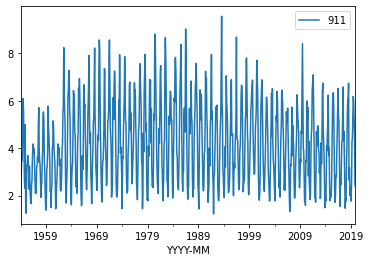

In [68]:
evapdf.plot.line(x='YYYY-MM',y='911') # Plot quadrant 911 evaporation time series 

### Method 3: Get the actual file from an encrypted server

This section is saved for future semesters

---

## References
Overland, B. (2018). Python Without Fear. Addison-Wesley 
ISBN 978-0-13-468747-6. 

Grus, Joel (2015). Data Science from Scratch: First Principles with Python O’Reilly
Media. Kindle Edition.

Precord, C. (2010) wxPython 2.8 Application Development Cookbook Packt Publishing Ltd. Birmingham , B27 6PA, UK 
ISBN 978-1-849511-78-0.

In [69]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
engr1330content
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
